# ShapeNet

## Dataset

In [1]:
import torch
from torch import nn
from torch import optim
import os
import os.path as osp

import pytorch_lightning as pl

from torch.utils.data import DataLoader
from data.ShapeNet.ShapeNetDataLoader import PartNormalDataset

from pytorch_lightning.loggers import WandbLogger

In [2]:
category = 'Airplane'
fixed_points = 256
num_workers = 10
path = osp.realpath(osp.join('..', 'data', 'ShapeNet/raw'))

test_dataset = PartNormalDataset(root=path, npoints=fixed_points, split='test', class_choice=category)
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=True, num_workers=num_workers)

In [ ]:
from hpcs.utils.viz import plot_cloud

In [ ]:
cloud = test_dataset.__getitem__(1)

In [ ]:
points, label, targets = cloud

In [ ]:
plotter = plot_cloud(xyz=points, scalars=targets, point_size=3.0, notebook=True)

## Model

In [3]:
import wandb
import yaml
from test import configure

In [4]:
os.remove(os.path.join(os.getcwd(), 'config.yaml'))

In [5]:
os.remove(os.path.join(os.getcwd(), 'model.ckpt'))

In [6]:
config_yaml = wandb.restore(name='config.yaml', run_path='pierreoo/HPCS/runs/2ri0d8ms')
config = yaml.load(config_yaml, Loader=yaml.FullLoader)

In [7]:
model, trainer = configure(config)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Gpu:  0


In [8]:
wandb.restore('model.ckpt', run_path='pierreoo/HPCS/runs/2ri0d8ms')
model = model.load_from_checkpoint('model.ckpt')

Testing: 0it [00:00, ?it/s]

Parameter containing:
tensor([0.4868], requires_grad=True)
0.8


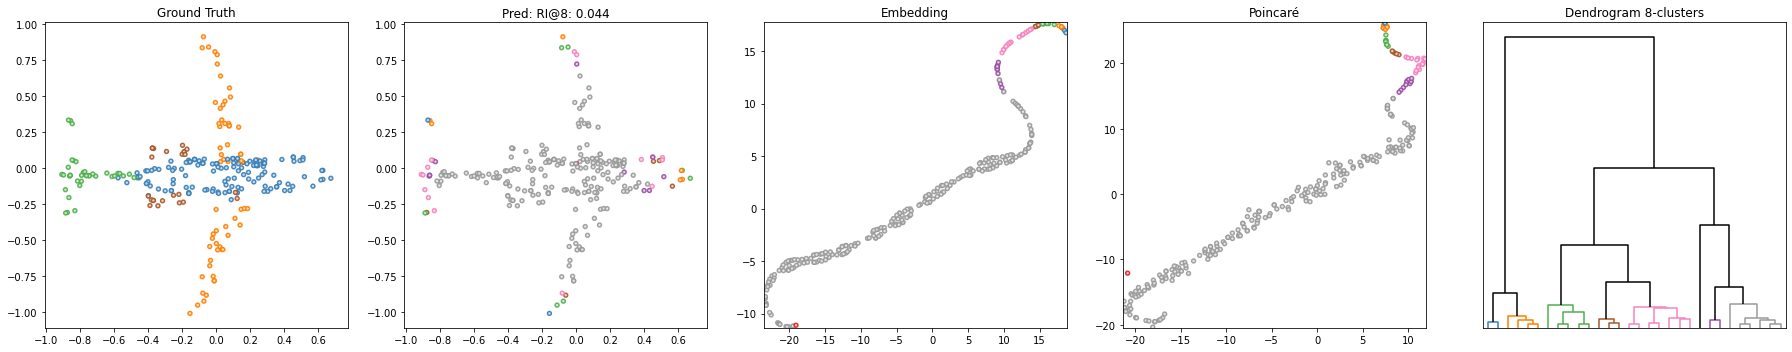

Parameter containing:
tensor([0.4868], requires_grad=True)
0.8


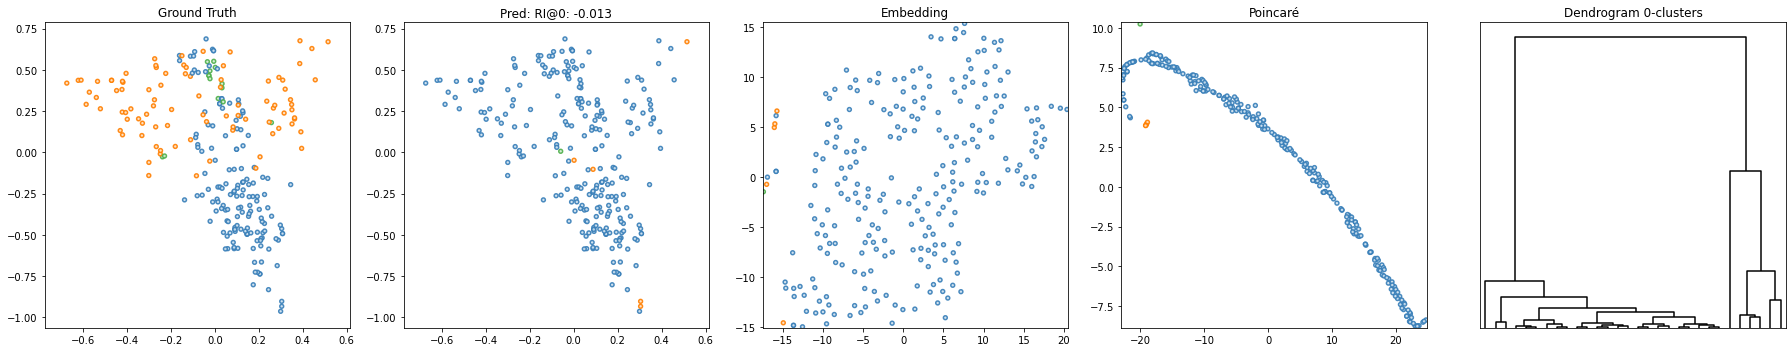

Parameter containing:
tensor([0.4868], requires_grad=True)
0.8


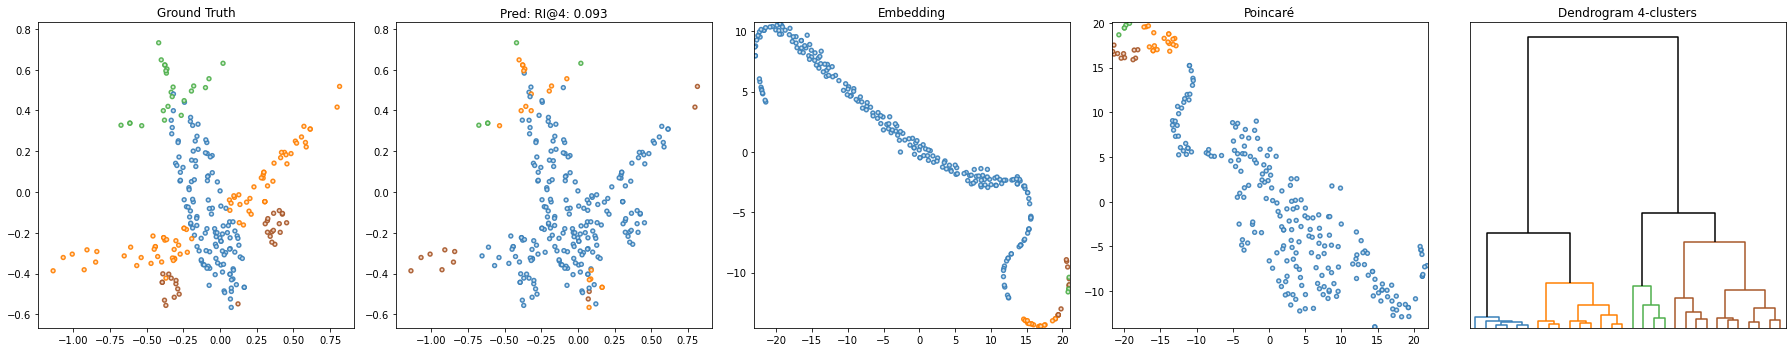

Parameter containing:
tensor([0.4868], requires_grad=True)
0.8


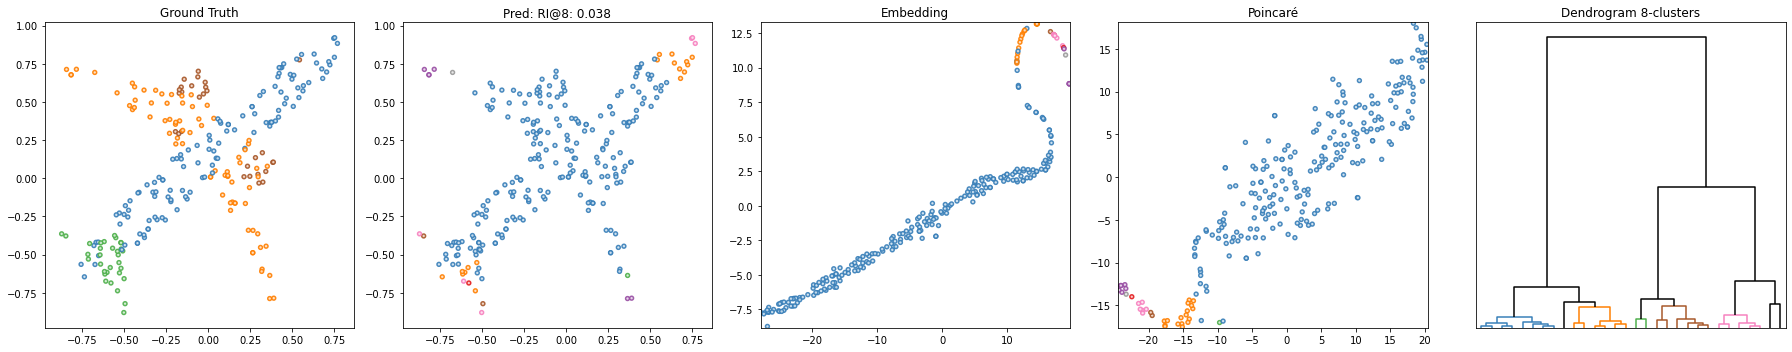

Parameter containing:
tensor([0.4868], requires_grad=True)
0.8


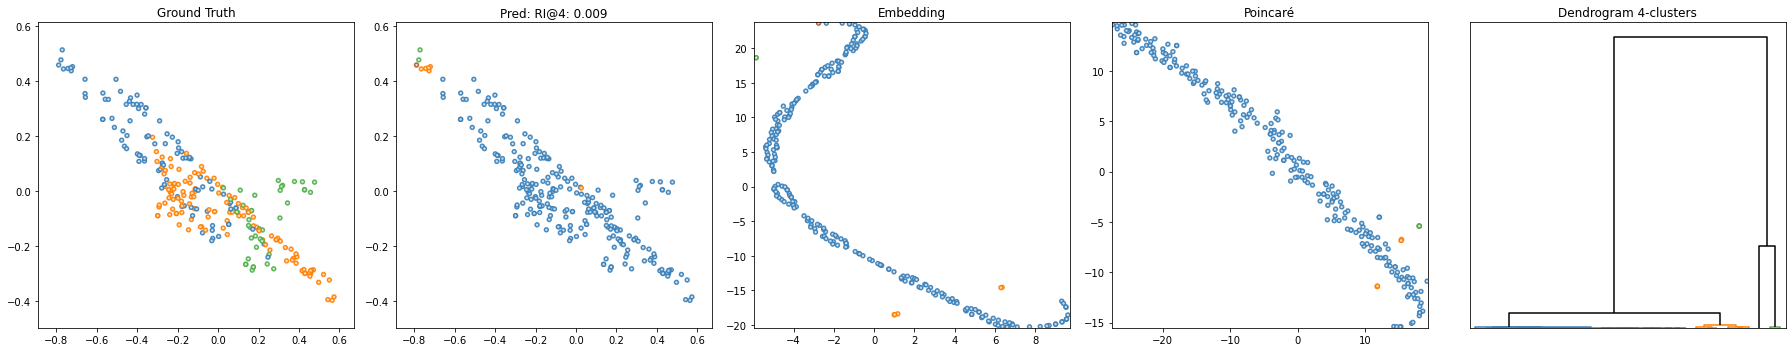

Parameter containing:
tensor([0.4868], requires_grad=True)
0.8


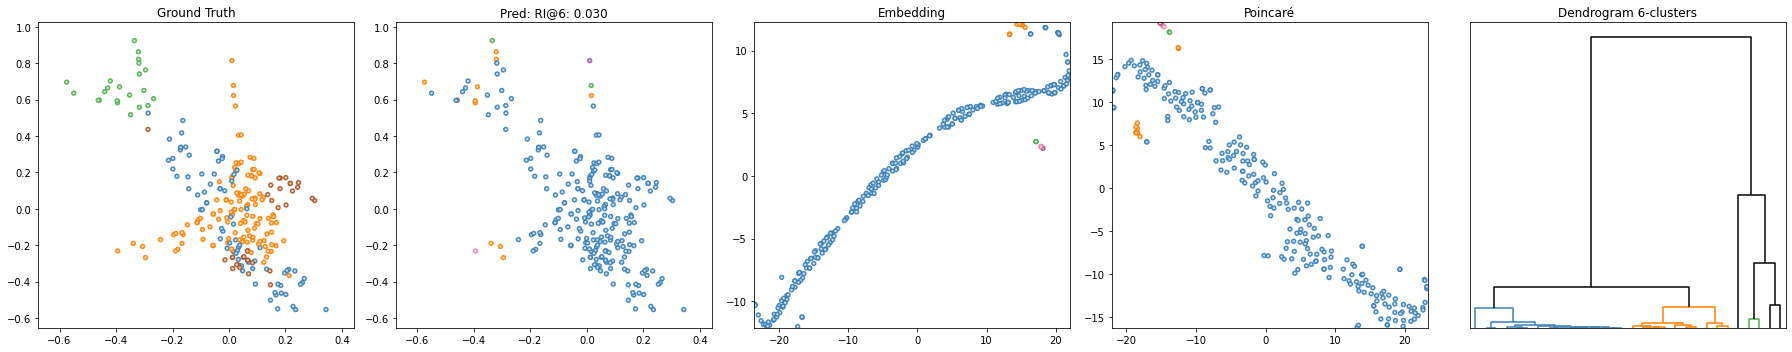

Parameter containing:
tensor([0.4868], requires_grad=True)
0.8


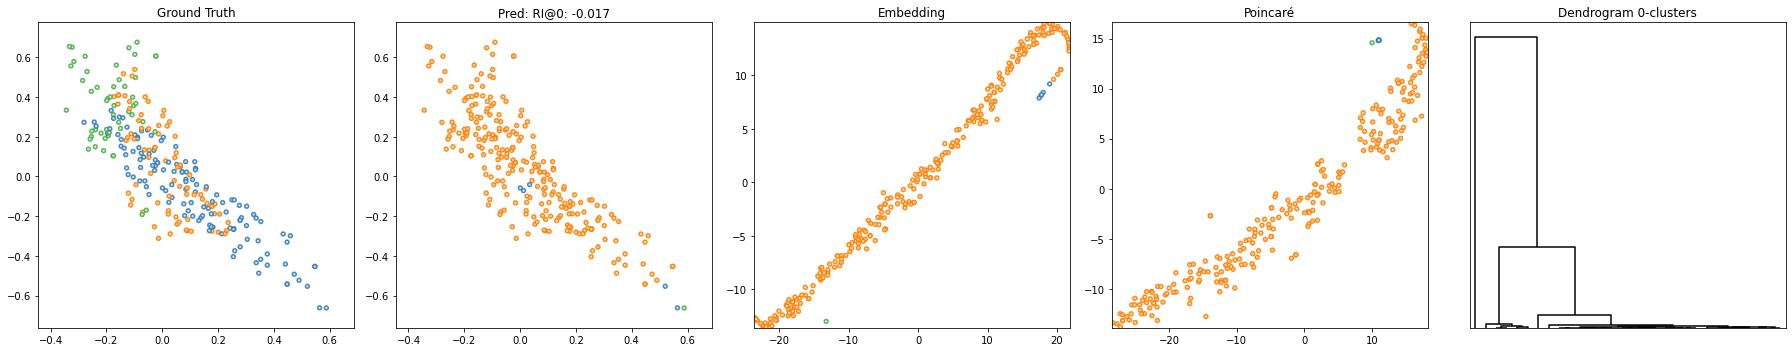

Parameter containing:
tensor([0.4868], requires_grad=True)
0.8


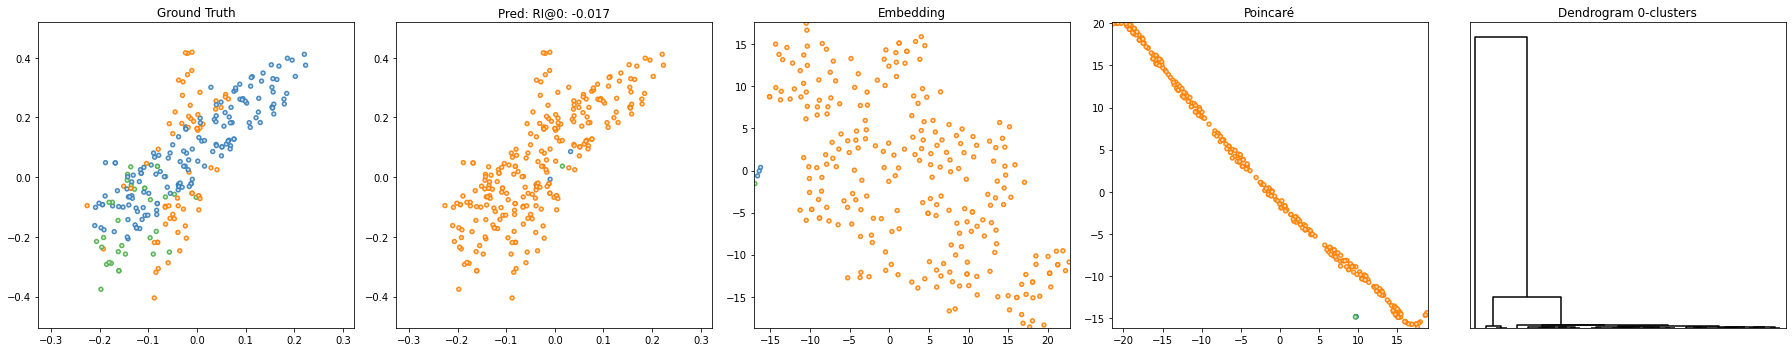

Parameter containing:
tensor([0.4868], requires_grad=True)
0.8


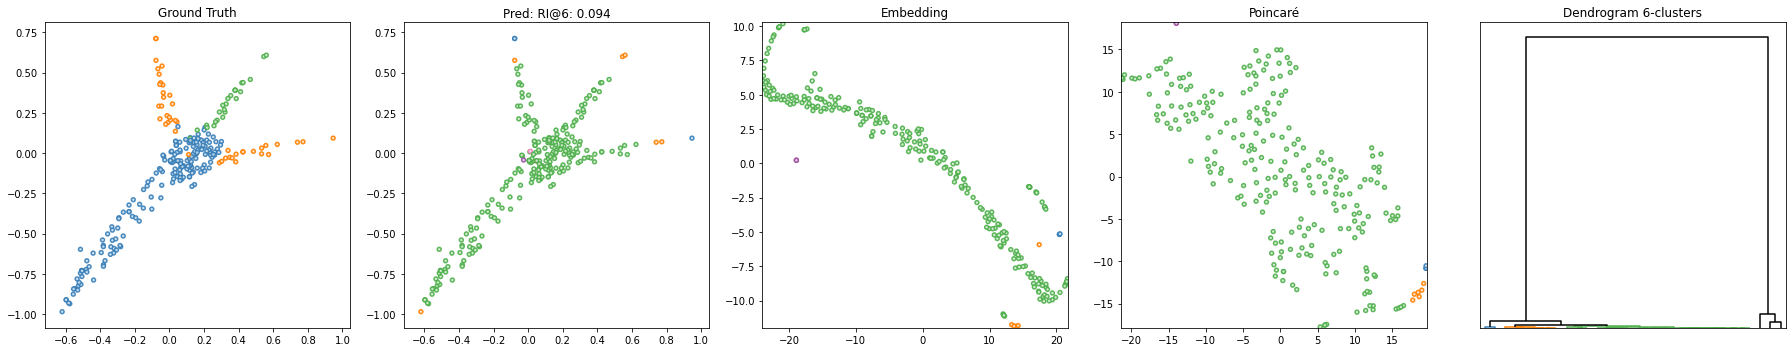

Parameter containing:
tensor([0.4868], requires_grad=True)
0.8


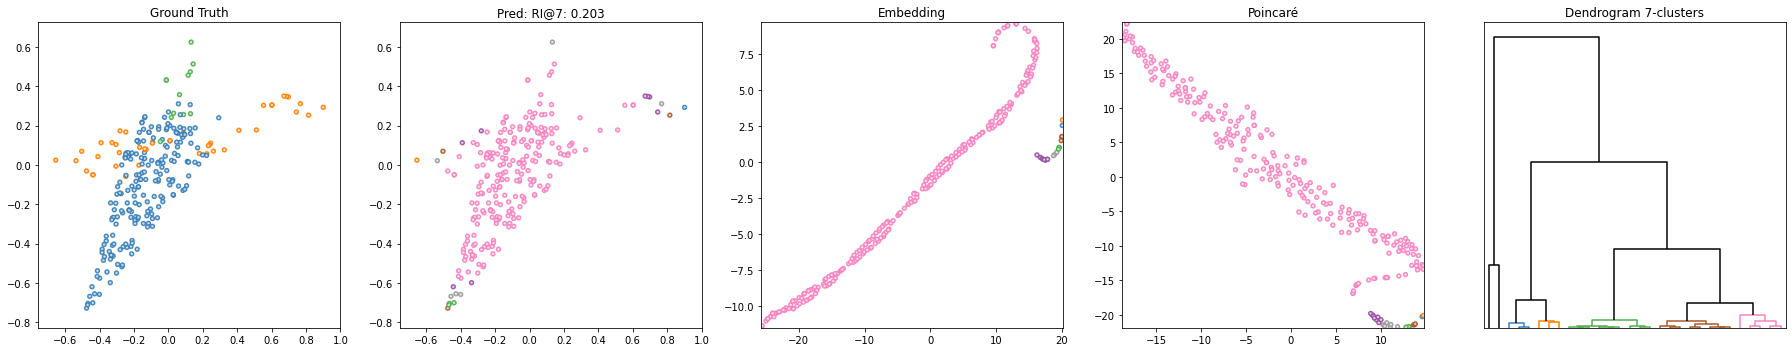

Parameter containing:
tensor([0.4868], requires_grad=True)
0.8


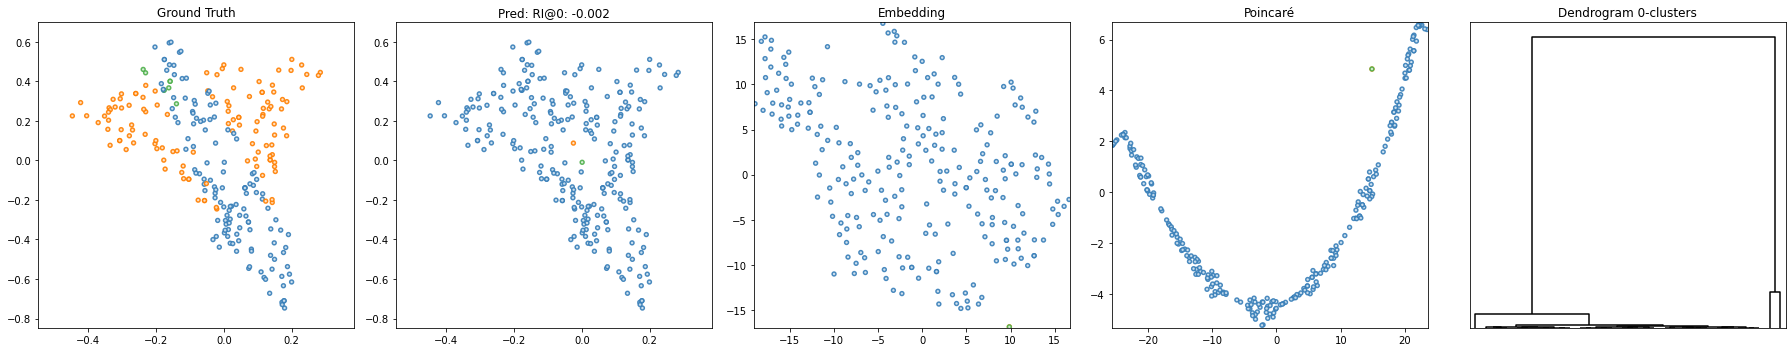

Parameter containing:
tensor([0.4868], requires_grad=True)
0.8


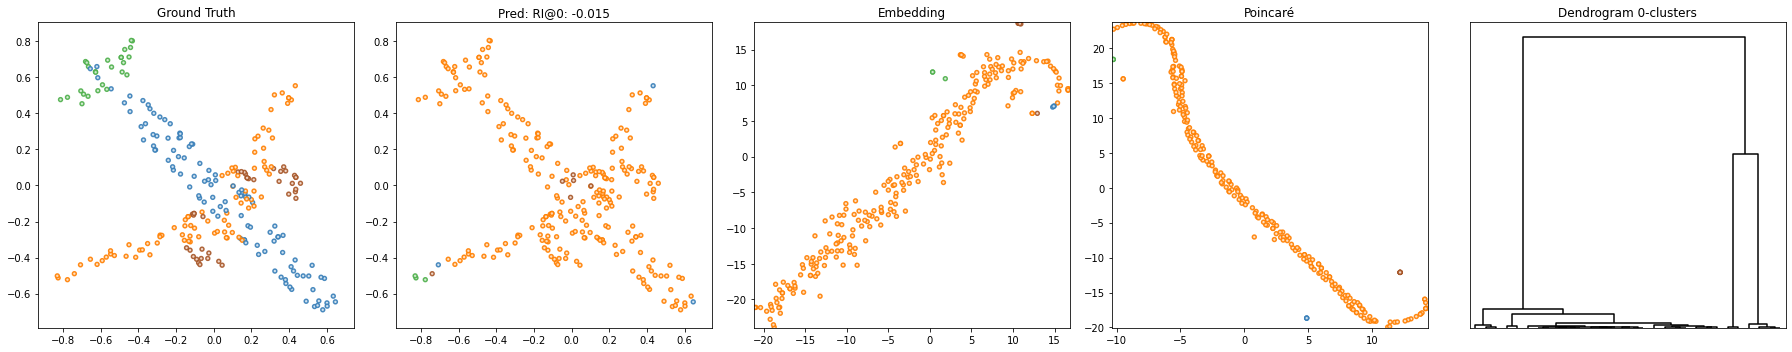

Parameter containing:
tensor([0.4868], requires_grad=True)
0.8


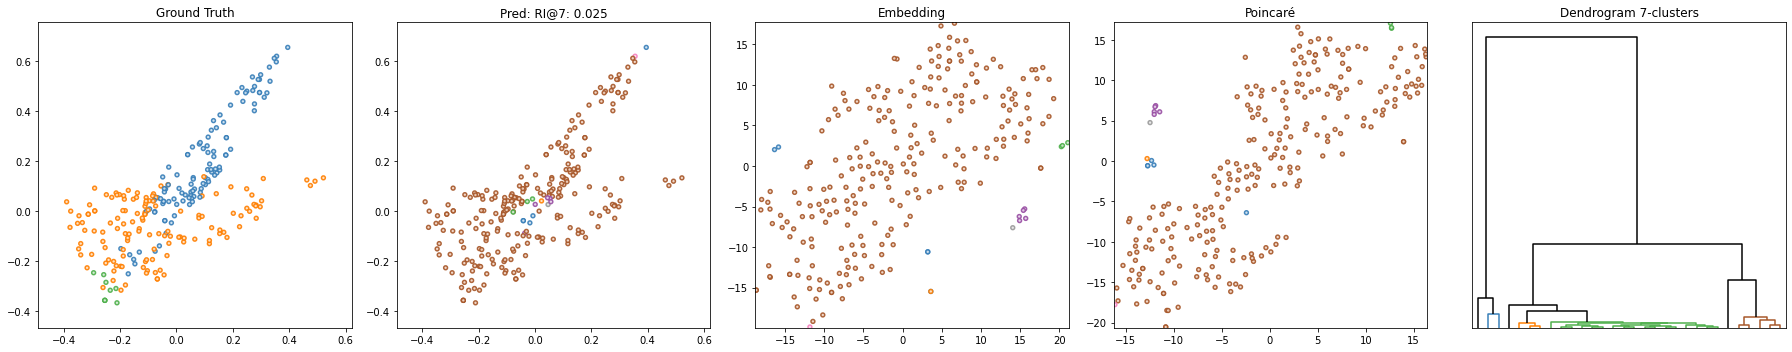

Parameter containing:
tensor([0.4868], requires_grad=True)
0.8


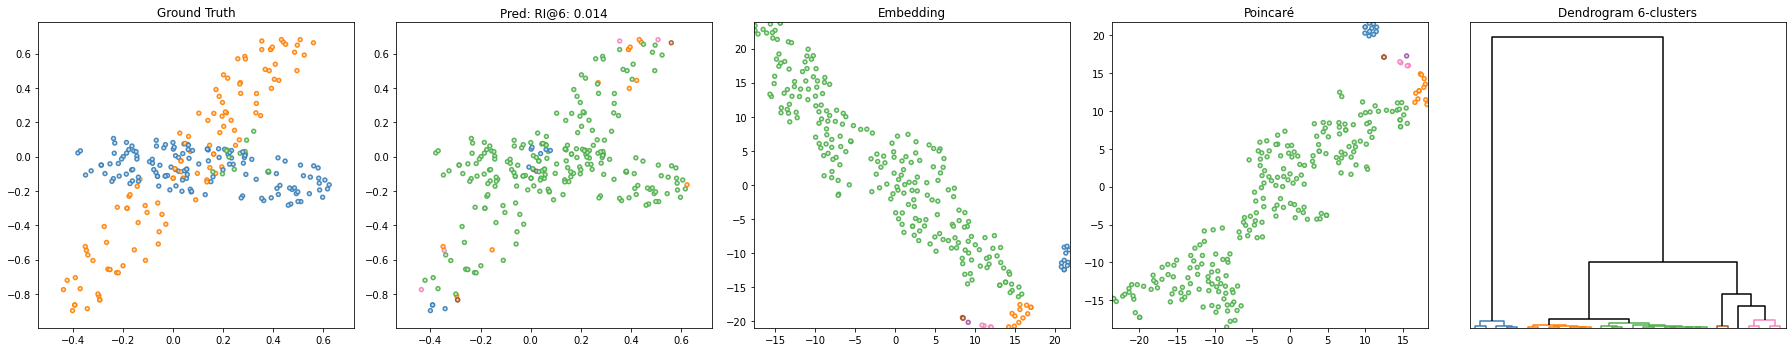

Parameter containing:
tensor([0.4868], requires_grad=True)
0.8


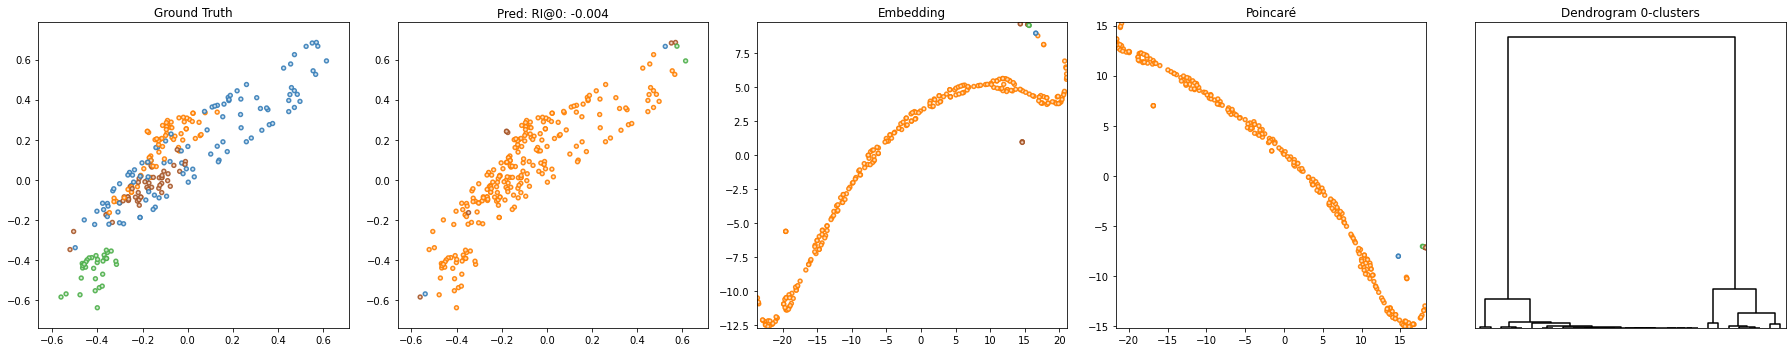

Parameter containing:
tensor([0.4868], requires_grad=True)
0.8


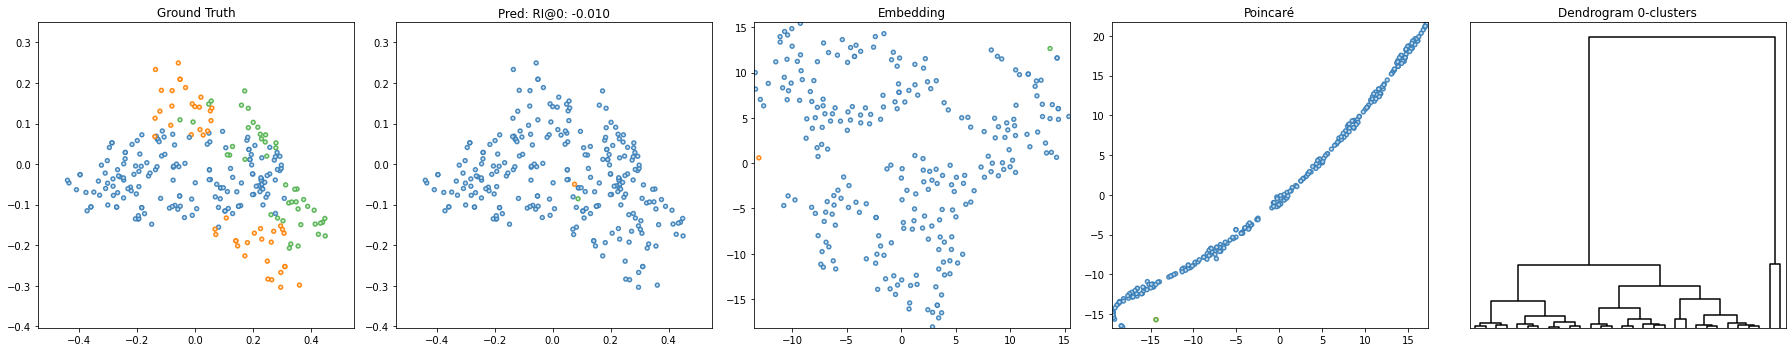

Parameter containing:
tensor([0.4868], requires_grad=True)
0.8


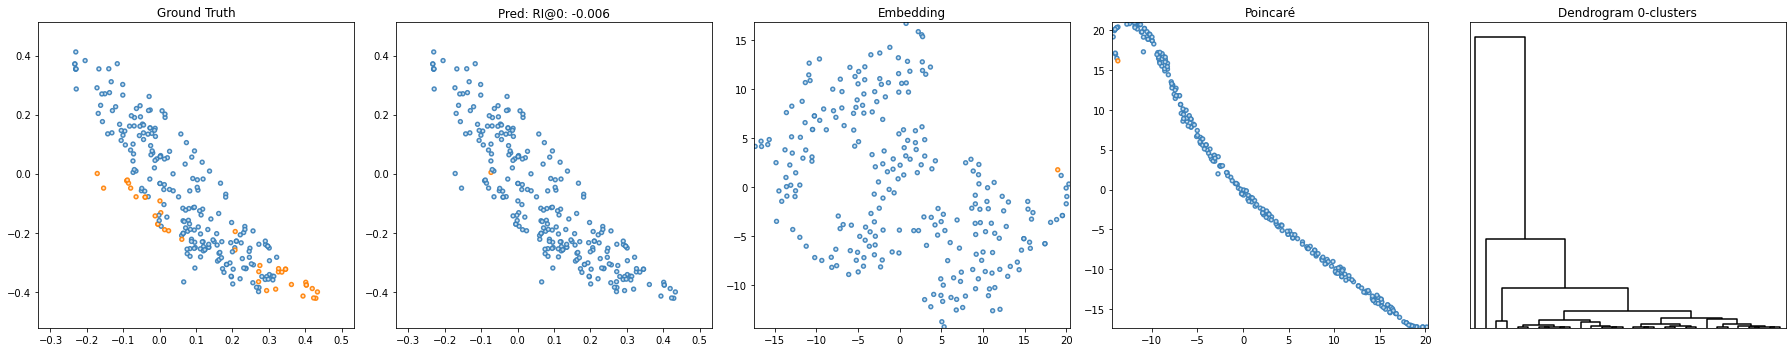

Parameter containing:
tensor([0.4868], requires_grad=True)
0.8


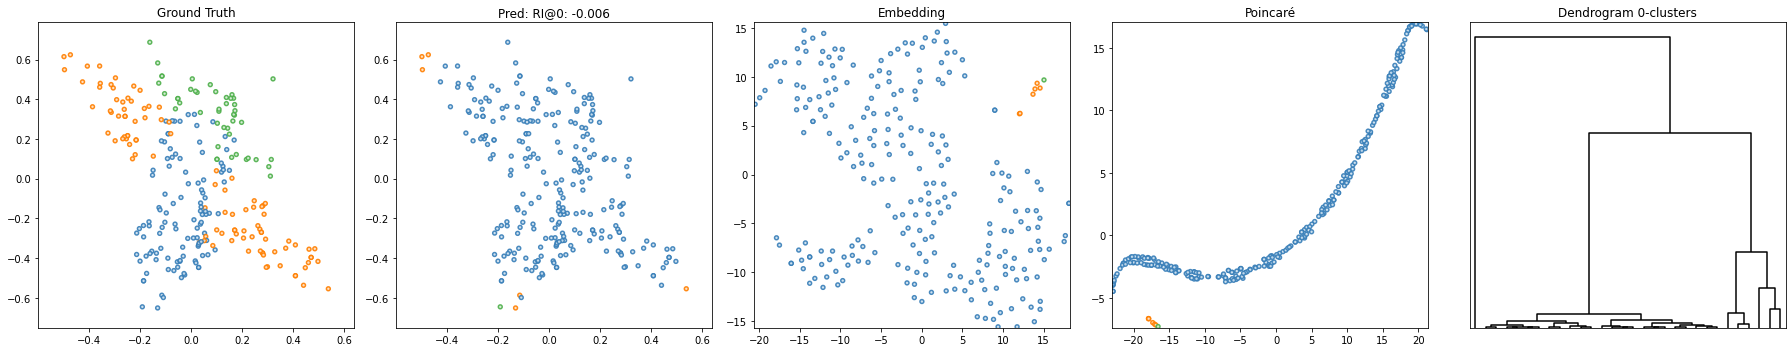

Parameter containing:
tensor([0.4868], requires_grad=True)
0.8


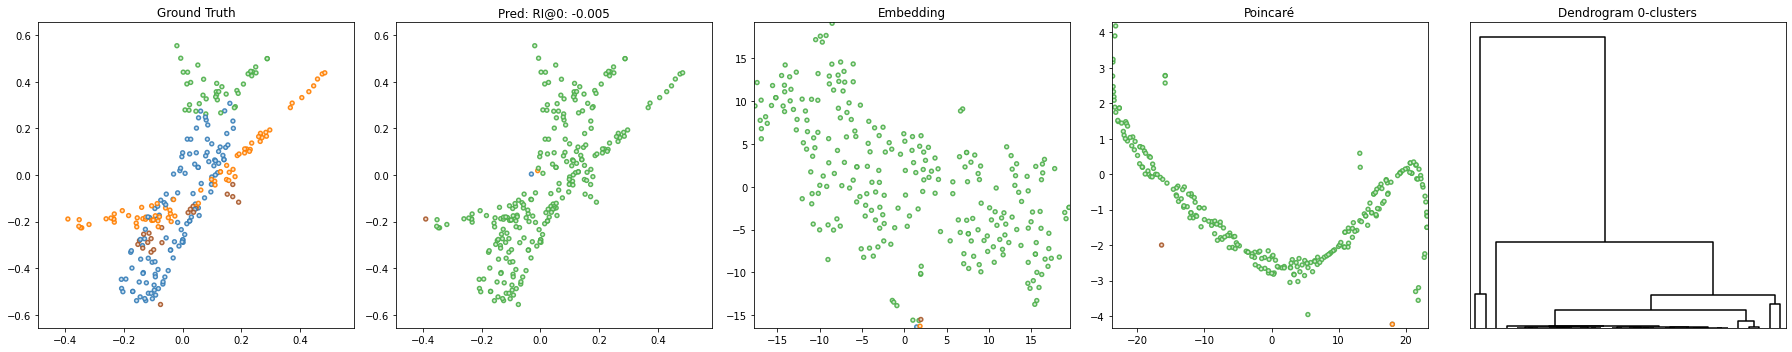

Parameter containing:
tensor([0.4868], requires_grad=True)
0.8


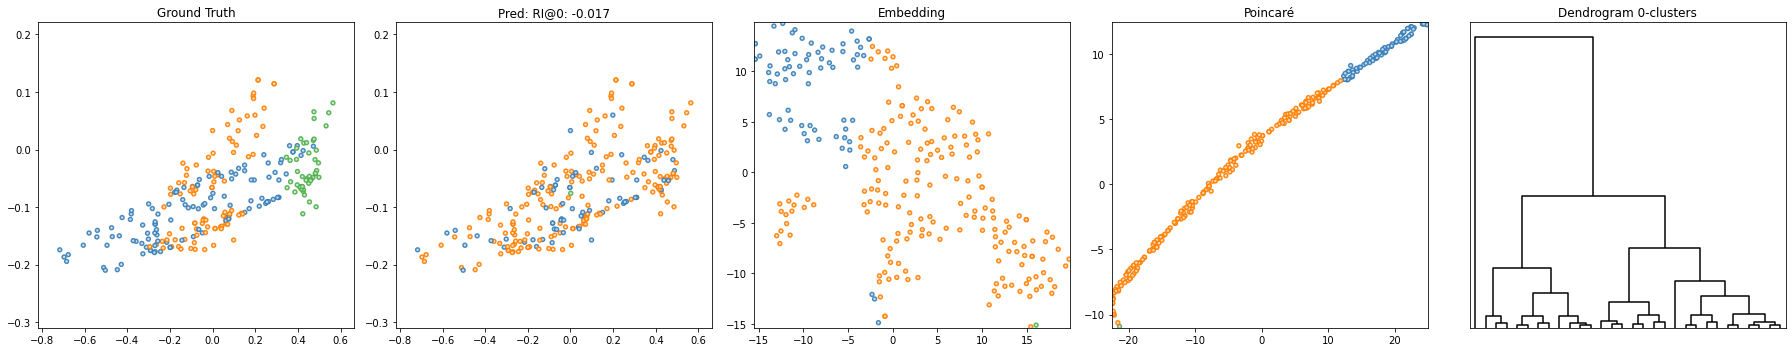

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        test_loss            3.035189628601074
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


[{'test_loss': 3.035189628601074}]

In [9]:
trainer.test(model, test_loader)

In [10]:
for name, param in model.named_parameters():
    if param.requires_grad:
        print(name, param.data)

scale tensor([0.4868])
model.bn7.weight tensor([0.1245, 0.1245, 0.1245, 0.1245, 0.1245, 0.1245, 0.1245, 0.1245, 0.1245,
        0.1245, 0.1245, 0.1245, 0.1245, 0.1245, 0.1245, 0.1245, 0.1245, 0.1245,
        0.1245, 0.1245, 0.1245, 0.1245, 0.1245, 0.1245, 0.1245, 0.1245, 0.1245,
        0.1245, 0.1245, 0.1245, 0.1245, 0.1245, 0.1245, 0.1245, 0.1245, 0.1245,
        0.1245, 0.1245, 0.1245, 0.1245, 0.1245, 0.1245, 0.1245, 0.1245, 0.1245,
        0.1245, 0.1245, 0.1245, 0.1245, 0.1245, 0.1245, 0.1245, 0.1245, 0.1245,
        0.1245, 0.1245, 0.1245, 0.1245, 0.1245, 0.1245, 0.1245, 0.1245, 0.1245,
        0.1245])
model.bn7.bias tensor([-1.1987e-06, -2.1597e-05, -7.8972e-06, -1.9185e-05, -5.9692e-06,
        -6.8487e-06,  1.1423e-05,  1.2463e-05, -2.2187e-06, -1.1384e-06,
        -2.7554e-05, -1.4294e-06, -2.3372e-06, -1.0168e-05, -5.8482e-06,
        -4.2833e-06, -6.1342e-07, -3.8071e-05, -2.2776e-05, -1.4390e-06,
        -3.2223e-06, -2.4162e-05, -4.4953e-05, -2.4234e-05, -3.1317e-05,
   